In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
os.chdir('/project/ssverma_shared/projects/Endometriosis/Endo_Subtyping_Heterogeneity/Feature_Extraction/')

In [4]:
input_model='../Cluster_Training/Models/non_geno_PMBB_transfer_clusters.pickle'

In [13]:
model = pickle.load(open(input_model, 'rb'))
print(model)

need_cols = model.feature_names_in_

pmbb = pd.read_csv('Pheno/PMBB_2.3_pheno_covars.csv', index_col='PMBB_ID', nrows=None)
pmbb['Dataset'] = 'PMBB'

emerge = pd.read_csv('Pheno/eMERGE_pheno_covars.csv', index_col='SUBJID', dtype={'SUBJID': str}, nrows=None)
emerge.index = ['eMERGE' + i for i in emerge.index]
emerge['Dataset'] = 'eMERGE'

ukbb = pd.read_csv('Pheno/UKBB_pheno_covars.csv', index_col='f.eid', dtype={'f.eid': str}, nrows=None)
ukbb.index = ['UKBB' + i for i in ukbb.index]
ukbb['CURRENT_AGE'] = ukbb['AGE']
ukbb['Dataset'] = 'UKBB'

pheno = pd.concat([pmbb, emerge, ukbb])
pheno.index.name = 'IID'
print(pheno)

pheno = pheno[pheno['SEX'] == 'Female']
pheno['ANCESTRY'] = pheno['ANCESTRY'].replace({'EAS': 'ASIAN', 'SAS': 'ASIAN'})
pheno = pheno[pheno['ANCESTRY'].isin(['EUR', 'AFR'])]

features = pheno[pheno['endometriosis'] == 1][need_cols].copy()
features

                   endometriosis_icd9  endometriosis_icd9_age@dx  \
IID                                                                
PMBB1000437739273                   0                        NaN   
PMBB1000856639250                   0                        NaN   
PMBB1001117453706                   0                        NaN   
PMBB1001279971174                   0                        NaN   
PMBB1001368577866                   0                        NaN   
...                               ...                        ...   
UKBB6025323                         0                        NaN   
UKBB6025341                         0                        NaN   
UKBB6025362                         0                        NaN   
UKBB6025377                         0                        NaN   
UKBB6025386                         0                        NaN   

                   endometriosis_icd9_dx_ct  uterine_endometriosis_icd9  \
IID                                     

,abdominal_pelvic_pain,abnormal_cholesterol,asthma,dysmenorrhea,dysuria,fibromyalgia,high_risk_pregnancy_supervision,hypertension,ibs,infertility,irregular_menstruation,leiomyoma_of_uterus,lower_abdominal_pain,migraine,pain_with_sex,pcos,shortness_of_breath
IID,,,,,,,,,,,,,,,,,
PMBB1019800003470,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
PMBB1026257511052,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
PMBB1039039281507,1,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0
PMBB1052559903931,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
PMBB1058844982565,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKBB6021990,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
UKBB6023363,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
UKBB6023483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=3,
                     weights='distance')
                   endometriosis_icd9  endometriosis_icd9_age@dx  \
IID                                                                
PMBB1000274307312                   0                        NaN   
PMBB1000437739273                   0                        NaN   
PMBB1000856639250                   0                        NaN   
PMBB1001117453706                   0                        NaN   
PMBB1001279971174                   0                        NaN   
...                               ...                        ...   
UKBB6025341                         0                        NaN   
UKBB6025359                         0                        NaN   
UKBB6025362                         0                        NaN   
UKBB6025377                         0                        NaN   
UKBB6025386                         0                        NaN   


,abdominal_pelvic_pain,abnormal_cholesterol,asthma,dysmenorrhea,dysuria,fibromyalgia,high_risk_pregnancy_supervision,hypertension,ibs,infertility,irregular_menstruation,leiomyoma_of_uterus,lower_abdominal_pain,migraine,pain_with_sex,pcos,shortness_of_breath
IID,,,,,,,,,,,,,,,,,
PMBB1019800003470,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
PMBB1026257511052,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
PMBB1039039281507,1,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0
PMBB1052559903931,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
PMBB1058844982565,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKBB6021990,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
UKBB6023363,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
UKBB6023483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


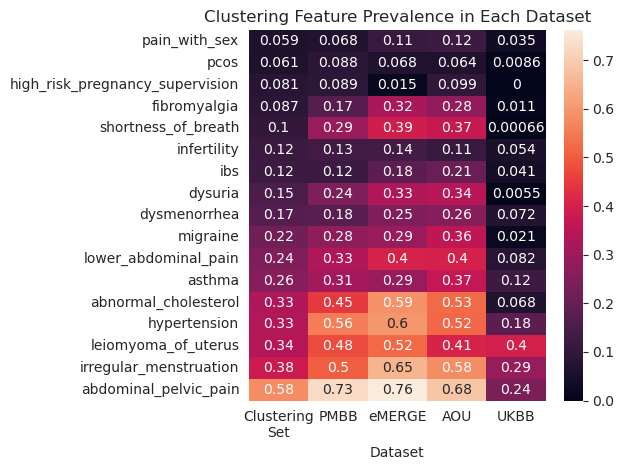

In [22]:
dataset_prev = features.groupby(pheno['Dataset']).mean().transpose()
training_prev = pd.read_csv('clustering_set_prev.csv', index_col='Feature')
aou_prev = pd.read_csv('AOU_feature_prev.csv', index_col='Feature')
dataset_prev['Clustering\nSet'] = training_prev
dataset_prev['AOU'] = aou_prev
dataset_prev = dataset_prev[['Clustering\nSet', 'PMBB', 'eMERGE', 'AOU', 'UKBB']]
dataset_prev = dataset_prev.sort_values(by=['Clustering\nSet'])

sns.heatmap(dataset_prev, annot=True)
plt.title('Clustering Feature Prevalence in Each Dataset')
plt.tight_layout()
plt.savefig('../Manuscript_Plots/supp_figure_2_all_dataset_cluster_feature_prevalence.png', bbox_inches='tight')
plt.show()

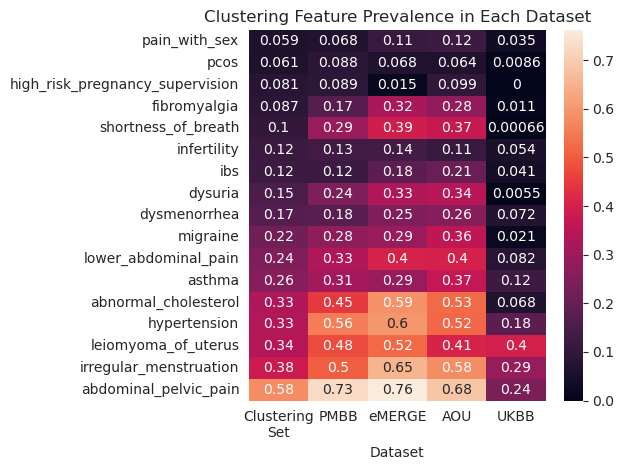

In [31]:
dataset_prev = features.groupby(pheno['Dataset']).mean().transpose()
training_prev = pd.read_csv('clustering_set_prev.csv', index_col='Feature')
aou_prev = pd.read_csv('AOU_feature_prev.csv', index_col='Feature')
dataset_prev['Clustering\nSet'] = training_prev
dataset_prev['AOU'] = aou_prev
dataset_prev = dataset_prev[['Clustering\nSet', 'PMBB', 'eMERGE', 'AOU', 'UKBB']]
dataset_prev = dataset_prev.sort_values(by=['Clustering\nSet'])

sns.heatmap(dataset_prev, annot=True)
plt.title('Clustering Feature Prevalence in Each Dataset')
plt.tight_layout()
plt.savefig('../Manuscript_Plots/supp_figure_2_all_dataset_cluster_feature_prevalence_heatmap.png', bbox_inches='tight')
plt.show()

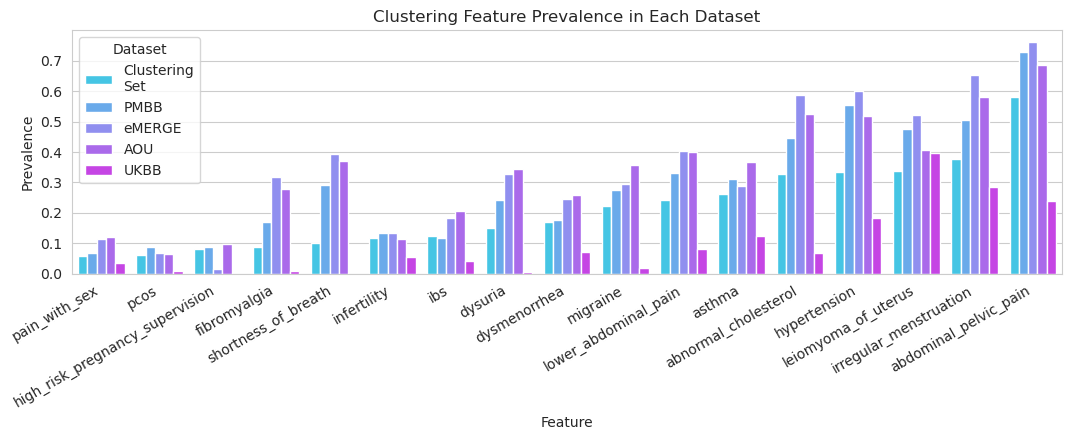

In [64]:
prev_long = dataset_prev.reset_index().melt(id_vars='index')
prev_long = prev_long.rename(columns={'index': 'Feature', 'value': 'Prevalence'})

fig, ax = plt.subplots()

sns.barplot(data=prev_long, x='Feature', hue='Dataset', y='Prevalence', ax=ax, palette='cool')
fig.set_size_inches(11, 4.5)

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.title('Clustering Feature Prevalence in Each Dataset')
plt.tight_layout()
plt.savefig('../Manuscript_Plots/supp_figure_2_all_dataset_cluster_feature_prevalence_barchart.png', bbox_inches='tight')
plt.show()